### Overview

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  



#### 1. Defining the Question

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

Part 1: Decision trees:
- For this section, you should build a model that makes the above prediction. You should not use individual decision trees, rather you should use at least 2 out of the 3 advanced models we have studied: Random forests, Ada boosted trees, and gradient boosted trees.
- Try and optimize each of the 2 models, making sure to document how you've set up your hyperparameters.
- Identify which of the 2 models you trust most, and use your model to determine which features are most impactful in influencing the prediction
- Note that with decision trees, you don't need to do a lot of data cleaning. This will be very different with SVM.

Part 2: SVM:

- In this section, you may be required to clean the data a little bit so as to make sense of the features.

- Document what transformation you've done on the data.

- Apply Polynomial, linear and rbf kernel function to build your SVM model and then evaluate their performance and pick the kernel that performs the best. Remember to tune your parameters to improve the performance of your model. To make your life easier, make sure to visualize the models you've created. Use any two features to build the models for this step.

Hint: You may want to use decision trees to give you the most preferable features you can use. but also keep in mind that those features might not be suitable for SVM. It might be a good idea to graph them first.

-  After getting your best performing kernel, use this kernel together with your tuned parameters and repeat the prediction but this time using additional features. Compare the model you've just created with the 2-features version. 

##### b) Defining the Metric for Success
The model will be considered a success when it is able to correctly and accurately indicate whether the patients in question have thyroids or not.

I look to using > 80% as a good target score for accuracy.

##### c) Understanding the context
The hospital would need to have a working system to group, classify and identify the infected patients from those who are not.

##### d) Recording the Experimental Design
- Perform EDA
- Visualize the Data

##### e) Data Relevance
The data was provided by the Moringa Data Science Program Education Department [https://ia803101.us.archive.org/3/items/hypothyroid/hypothyroid.csv].


##### f) Appropriateness of Data
Tests will be carried out to ensure that the data is approprraite for the study or whether additional data needs to be sourced

#### 2. Reading the Data
Importing the Libraries

In [55]:
import pandas as pd
import numpy as np

import seaborn as sb
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


In [56]:
# Before reading our dataset, we would like to ensure all columns are visible 
# ---
#  
pd.set_option("display.max.columns", None)

In [57]:
thyriod = pd.read_csv('https://ia903101.us.archive.org/3/items/hypothyroid/hypothyroid.csv')
thyriod.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [58]:
def preparation (df):

    # df = pd.read_csv(dataset)
 
    # print(f"\nShape of the Dataset:{df.head(5)}")
    print(f"\n Info of the Dataset:")
    print(f"\n {df.info()}")
    print(f"\n Shape of the Dataset:{df.shape}")
    print(f"\n Description of the Dataset:")
    print(f"\n {df.describe()}")
    
    return df

In [60]:
thyriod.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [61]:
thyriod.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

##### Data Preparation

In [62]:
preparation(thyriod)


 Info of the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


#### Check For Missing values

In [63]:
 
 
# Creating a function to check
def missing_values(data):
 
 # identifying the missing values from the demographic data dataset
 #
 miss = data.isnull().sum().sort_values(ascending = False)
 # finding the percentage of missing values
 percentage = (data.isnull().sum() / len(data)).sort_values(ascending = False)
 # storing  total missing values in percentage in dataframe
 #
 missing_data = pd.DataFrame({'Total' : miss, 'Percentage' : percentage})
 #if the percentage is 0, indicates no missing values hence removed
 #
 missing_data.drop(missing_data[missing_data['Percentage'] == 0].index, inplace = True)
 
 return missing_data
 
missing_values(thyriod)


,Total,Percentage


#### Check for Duplicates

In [64]:
# Check For Duplicate values
# occurrence based on all columns
duplicate = thyriod[thyriod.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.80,y,53,y,0.86,y,61,n,?
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100,y,0.40,y,10,y,1,y,10,n,?
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23,y,0.50,y,33,y,0.67,y,49,n,?
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.60,y,47,y,0.97,y,48,n,?
131,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34,n,?,y,55,y,0.93,y,60,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28,M,f,f,f,f,f,f,f,f,f,f,f,y,1,y,3.10,y,107,y,1.05,y,103,n,?
3055,negative,33,F,f,f,f,f,f,f,f,f,f,f,f,n,?,y,0.80,y,88,y,1.02,y,86,n,?
3066,negative,74,F,t,f,f,f,f,f,f,f,f,f,f,y,21,y,1.80,y,126,y,1.18,y,107,n,?
3111,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.90,y,82,y,0.80,y,103,n,?


#### Replacing Special Characters to Integers

In [90]:
# Create Dictionary:
import re

dictionary = {re.compile('^[?]$'):''}


# Replace:

thyriod.replace(dictionary, regex=True, inplace=True)

#### Encoding all the non integer variables


In [94]:
# Display all the columns that are object type   

cols = thyriod.select_dtypes(include="object").columns.tolist()
cols


['status',
 'age',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'TSH_measured',
 'TSH',
 'T3_measured',
 'T3',
 'TT4_measured',
 'TT4',
 'T4U_measured',
 'T4U',
 'FTI_measured',
 'FTI',
 'TBG_measured',
 'TBG']

In [95]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)



In [110]:
thyriod_encoded = MultiColumnLabelEncoder(columns = ['status','age', 'sex', 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured',
 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']).fit_transform(thyriod)

 

##### 2.1. Random Forest Method 

In [112]:
y = thyriod_encoded['status'].values

test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']
       
X = thyriod_encoded[test_features].values

In [113]:
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

,Actual,Predicted
count,949.000000,949.000000
mean,0.958904,0.954103
std,0.198617,0.150830
min,0.000000,0.119851
25%,1.000000,0.996171
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [114]:
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.04059907783420776
Mean Squared Error: 0.019534576687799392
Root Mean Squared Error: 0.13976615000707215


In [115]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)

In [116]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.25), ('T3_measured', 0.0), ('T3', 0.16), ('TT4_measured', 0.0), ('TT4', 0.11), ('T4U_measured', 0.0), ('T4U', 0.09), ('FTI_measured', 0.0), ('FTI', 0.4), ('TBG_measured', 0.0), ('TBG', 0.0)]

Variable: FTI                  Importance: 0.4
Variable: TSH                  Importance: 0.25
Variable: T3                   Importance: 0.16
Variable: TT4                  Importance: 0.11
Variable: T4U                  Importance: 0.09
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: t

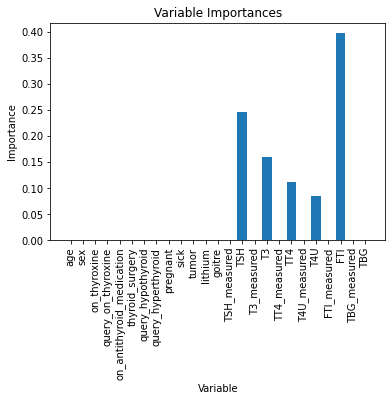

In [117]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

The model clearly shows the most important variables that positively influence the test being positive for thyroid:

- FTI 
- TSH
- T3
- TT4
- T4U

#### 2.2. Gradient Boosting Classifier

In [119]:
thyriod_encoded.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,count
0,0,68,2,0,0,0,0,0,0,0,0,0,0,0,1,135,1,8,1,56,1,117,1,3,0,0,0
1,0,7,1,1,0,0,0,0,0,0,0,0,0,0,1,80,1,19,1,100,1,82,1,80,0,0,0
2,0,16,2,0,0,0,0,0,0,0,0,0,0,0,1,1,1,4,1,194,1,69,1,1,0,0,0
3,0,16,1,0,0,0,0,0,0,0,0,0,0,0,1,159,1,6,1,220,1,73,1,221,0,0,0
4,0,73,2,0,0,0,0,0,0,0,0,0,0,0,1,201,1,14,1,217,1,97,1,197,0,0,0


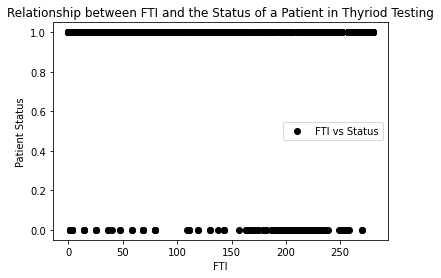

In [122]:

y = thyriod_encoded['status'].values

test_features = ['FTI']

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = thyriod_encoded[test_features].values

# Let's visualize what the data looks like
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="FTI vs Status")
plt.xlabel("FTI")
plt.ylabel("Patient Status")
plt.title("Relationship between FTI and the Status of a Patient in Thyriod Testing")
plt.legend()
plt.show()

In [137]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a decision tree classifier, we will set its max_depth to 4
# What happens if you decrease this parameter? if you increase it? 
# What happens if you remove it altogether?
# tree = DecisionTreeRegressor(max_depth=30)
tree = DecisionTreeRegressor()

# Train it on our training set.
tree = tree.fit(X_train, y_train)

# Predict based on the model we've trained, note that we apply it to the whole data set this time
y_pred_tree = tree.predict(X)

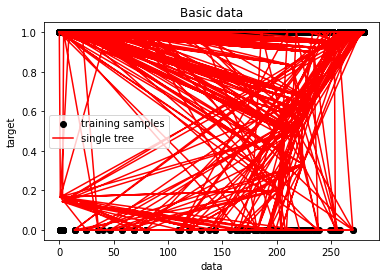

In [138]:
# Let's visualize what the data looks like
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_pred_tree, c="r", label="single tree")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()

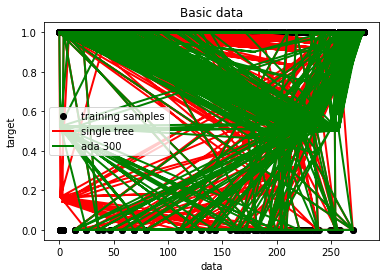

In [141]:
from sklearn.ensemble import AdaBoostRegressor

# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(),
                          n_estimators=300, random_state=0)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X)

# 
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_pred_tree, c="r", label="single tree", linewidth=2)
plt.plot(X, y_pred_ada, c="g", label="ada 300", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()

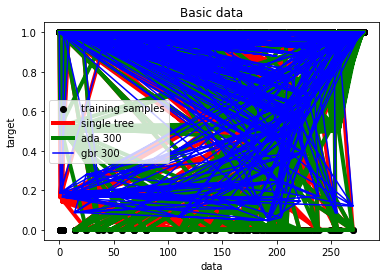

In [143]:
from sklearn.ensemble import GradientBoostingRegressor
target_number_of_trees = 300

gbr = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.1)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X)

plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_pred_tree, c="r", label="single tree", linewidth=4)
plt.plot(X, y_pred_ada, c="g", label="ada 300", linewidth=4)
plt.plot(X, y_pred_gbr, c="b", label="gbr 300")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Basic data")
plt.legend()
plt.show()

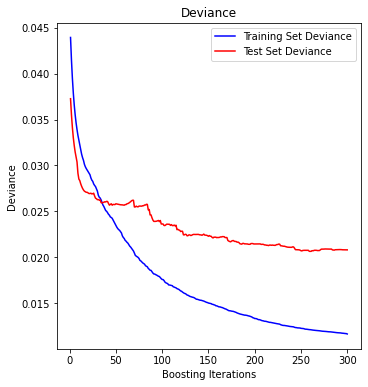

In [144]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
# the train_score_ variable is a list that records the deviance of the model for any given number of trees. gbr.train_score_[0] is the deviance when we only had the initial tree, whereas
# gbr.train_score_[100] is the deviance by the time we have created 100 trees.
# This is plotted against a simple list that goes from 1 to our target number of trees.
plt.plot(np.arange(target_number_of_trees) + 1, gbr.train_score_, 'b-',
         label='Training Set Deviance')

# We also want to see how well we could handle the test set each time. 
# The staged_predict function takes an X, and returns a list of the predictions for X at various stages of the training: What did we pick when we had 1 tree, 2 trees, 3 trees, etc.
# We will compare our predictions at each stage against the test data, and compute the deviance
test_score = np.zeros((target_number_of_trees,), dtype=np.float64) # this is just a list of 0s

for i, y_pred in enumerate(gbr.staged_predict(X_test)):
    # For each prediction, compute the loss function comparing the actual data with your prediction at a given stage of training
    test_score[i] = gbr.loss_(y_test, y_pred)
    
plt.plot(np.arange(target_number_of_trees) + 1, test_score, 'r-',
         label='Test Set Deviance')

plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()